In [44]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [45]:
df_DE_DK=df[(df['job_country']=='Denmark') & (df['job_title_short'] == 'Data Engineer')].copy()

In [46]:
df_DE_DK['job_posted_mo']=df_DE_DK['job_posted_date'].dt.month

In [47]:
df_DE_DK_explode=df_DE_DK.explode('job_skills')

In [48]:
df_DE_DK_pivot = df_DE_DK_explode.pivot_table(
    index="job_posted_mo", columns="job_skills", aggfunc="size", fill_value=0
)

df_DE_DK_pivot.loc["Total"] = df_DE_DK_pivot.sum()
df_DE_DK_pivot = df_DE_DK_pivot[
    df_DE_DK_pivot.loc["Total"].sort_values(ascending=False).index
]
df_DE_DK_pivot=df_DE_DK_pivot.drop("Total")
df_DE_DK_pivot

job_skills,sql,python,azure,aws,databricks,spark,airflow,git,power bi,docker,...,clickup,fortran,selenium,pulumi,opencv,spreadsheet,swift,visio,vue,vue.js
job_posted_mo,,,,,,,,,,,,,,,,,,,,,
1,180,179,157,107,55,72,50,49,42,42,...,1,1,0,0,0,0,0,0,1,0
2,85,83,55,42,27,17,16,19,24,17,...,0,0,0,0,0,0,0,0,0,0
3,105,106,78,47,33,31,28,22,25,11,...,0,0,0,0,0,1,0,0,0,0
4,74,72,53,47,29,33,18,18,13,17,...,0,0,0,0,0,0,0,1,0,0
5,91,97,51,56,20,28,15,13,10,14,...,0,0,0,0,0,0,0,0,0,0
6,69,76,49,38,27,26,12,11,13,10,...,0,0,0,0,0,0,0,0,0,0
7,77,70,44,35,36,30,12,12,14,10,...,0,0,0,0,0,0,0,0,0,0
8,79,79,53,40,38,24,13,13,18,19,...,0,0,0,0,0,0,0,0,0,0
9,66,58,32,30,16,14,14,16,10,16,...,0,0,0,0,1,0,0,0,0,1


In [49]:
DE_totals=df_DE_DK.groupby('job_posted_mo').size()

In [51]:
df_DE_DK_percent = df_DE_DK_pivot.div(DE_totals / 100, axis=0)

df_DE_DK_percent = df_DE_DK_percent.reset_index()
df_DE_DK_percent["job_posted_month"] = df_DE_DK_percent["job_posted_mo"].apply(
    lambda x: pd.to_datetime(x, format="%m").strftime("%b")
)
df_DE_DK_percent = df_DE_DK_percent.set_index("job_posted_month")
df_DE_DK_percent = df_DE_DK_percent.drop(columns="job_posted_mo")

df_DE_DK_percent

job_skills,sql,python,azure,aws,databricks,spark,airflow,git,power bi,docker,...,clickup,fortran,selenium,pulumi,opencv,spreadsheet,swift,visio,vue,vue.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,63.380282,63.028169,55.281690,37.676056,19.366197,25.352113,17.605634,17.253521,14.788732,14.788732,...,0.352113,0.352113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352113,0.000000
Feb,63.432836,61.940299,41.044776,31.343284,20.149254,12.686567,11.940299,14.179104,17.910448,12.686567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,61.403509,61.988304,45.614035,27.485380,19.298246,18.128655,16.374269,12.865497,14.619883,6.432749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.584795,0.000000,0.000000,0.000000,0.000000
Apr,54.411765,52.941176,38.970588,34.558824,21.323529,24.264706,13.235294,13.235294,9.558824,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.735294,0.000000,0.000000
May,73.387097,78.225806,41.129032,45.161290,16.129032,22.580645,12.096774,10.483871,8.064516,11.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.607143,67.857143,43.750000,33.928571,24.107143,23.214286,10.714286,9.821429,11.607143,8.928571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,65.254237,59.322034,37.288136,29.661017,30.508475,25.423729,10.169492,10.169492,11.864407,8.474576,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,66.949153,66.949153,44.915254,33.898305,32.203390,20.338983,11.016949,11.016949,15.254237,16.101695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,69.473684,61.052632,33.684211,31.578947,16.842105,14.736842,14.736842,16.842105,10.526316,16.842105,...,0.000000,0.000000,0.000000,0.000000,1.052632,0.000000,0.000000,0.000000,0.000000,1.052632


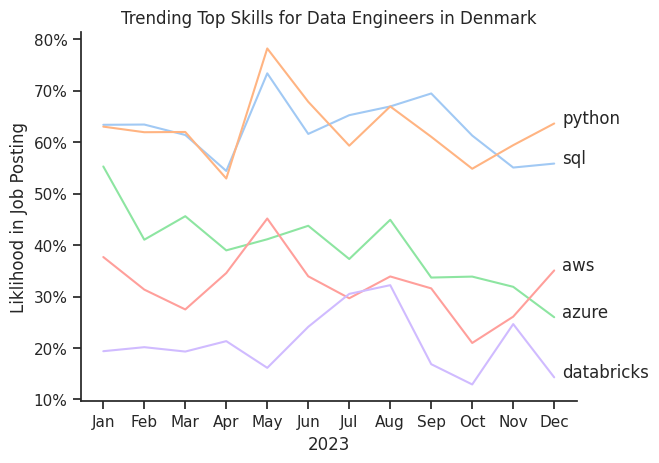

In [66]:
df_plot = df_DE_DK_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="pastel")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trending Top Skills for Data Engineers in Denmark")
plt.ylabel("Liklihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])


plt.show()